In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
#verify implementation of TSNE

In [51]:
frame = pd.read_csv('for_data_science_newline_fixed.csv', usecols = ["IN FILE","LAST MOD BY","CLIP LENGTH","OFFSET","DURATION"])
frame.head()

,IN FILE,CLIP LENGTH,OFFSET,DURATION,LAST MOD BY
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,alarce
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,alarce
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,alarce
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,alarce
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,alarce


In [52]:
def species(row):
    species = row['IN FILE']
    spec = species.split('-')
    spec_to = '-'.join(spec[:-2])
    return spec_to

frame['GENUS'] = frame.apply (lambda row: species(row), axis=1)
frame.head()

,IN FILE,CLIP LENGTH,OFFSET,DURATION,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,alarce,Aburria
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,alarce,Aburria
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,alarce,Aburria
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,alarce,Aburria
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,alarce,Aburria


In [53]:
LAST_MOD_BY = frame.groupby('IN FILE')[['LAST MOD BY']].max()
GENUS = frame.groupby('IN FILE')[['GENUS']].max()

In [54]:
IQR_DURATION = frame.groupby('IN FILE')[['DURATION']].quantile([.25,.5,.75])
IQR_DURATION = IQR_DURATION.unstack(1)
IQR_DURATION = IQR_DURATION['DURATION'].rename_axis([None], axis=1)
IQR_DURATION = IQR_DURATION.join(LAST_MOD_BY)
IQR_DURATION = IQR_DURATION.join(GENUS).reset_index()
IQR_DURATION = IQR_DURATION.rename(columns = {.25:'0.25',.5:'0.5',.75:'0.75'})
IQR_DURATION.head()

,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,2.665400,3.3205,3.3855,alarce,Aburria
1,Aburria-aburri-387212.wav,3.110000,3.1400,3.1700,alarce,Aburria
2,Accipiter-bicolor-451839.wav,0.202975,0.2155,0.2215,alarce,Accipiter
3,Accipiter-collaris-260335.wav,0.895100,1.0301,1.0876,alarce,Accipiter
4,Accipiter-collaris-260336.wav,0.515075,0.5701,0.6700,alarce,Accipiter


In [55]:
annotator = IQR_DURATION['LAST MOD BY'].unique()
sampled_annotator = ['EdZamora','kkong'] #random.sample(list(annotator),1)
print(sampled_annotator)
annotator_df = IQR_DURATION[IQR_DURATION['LAST MOD BY'].isin(sampled_annotator)]

# genus_counts = annotator_df['GENUS'].value_counts()
# sampled_genus = genus_counts.index[:5]#random.sample(list(genus),1)
# print(sampled_genus)

genus = annotator_df[['LAST MOD BY','GENUS']].groupby(['GENUS','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
genus['LAST MOD BY'] = (genus['LAST MOD BY']+' '+genus['COUNT'].astype(str))
genus = genus.drop(columns = ['COUNT']).groupby('GENUS')['LAST MOD BY'].apply(list).to_dict()
shared_genus_anns = [i for i in genus if len(genus.get(i)) == 2]
rand_shared_genus_anns = random.sample(list(shared_genus_anns),5)
print(shared_genus_anns)
print(rand_shared_genus_anns)

IQR_DURATION = annotator_df[annotator_df['GENUS'].isin(shared_genus_anns)] # shared_genus_anns
IQR_DURATION

['EdZamora', 'kkong']
['Arremon', 'Automolus', 'Bolborhynchus', 'Brotogeris', 'Buteo', 'Campephilus', 'Catamenia', 'Catharus', 'Cercomacroides', 'Coccyzus', 'Coeligena', 'Coereba', 'Colaptes', 'Conopophaga', 'Contopus', 'Cranioleuca', 'Crotophaga', 'Crypturellus', 'Dacnis', 'Daptrius', 'Dendrocincla', 'Diglossa', 'Dryocopus', 'Elaenia', 'Epinecrophylla', 'Euchrepomis', 'Euphonia', 'Falco', 'Furnarius', 'Galbula', 'Glaucidium', 'Hafferia', 'Helicolestes', 'Heliodoxa', 'Hemitriccus', 'Henicorhina', 'Hirundinea', 'Ictinia', 'Iridosornis', 'Leptopogon', 'Leptotila', 'Lurocalis', 'Micrastur', 'Micropygia', 'Mimus', 'Mionectes', 'Molothrus', 'Myadestes', 'Myiarchus', 'Myiophobus', 'Myiothlypis', 'Neopelma', 'Pachyramphus', 'Phrygilus', 'Phyllomyias', 'Picumnus', 'Pipile', 'Piprites', 'Platyrinchus', 'Psarocolius', 'Pyrilia', 'Pyrrhomyias', 'Ramphastos', 'Ramphocelus', 'Rhynchocyclus', 'Saltator', 'Sarcoramphus', 'Setophaga', 'Sporophila', 'Tachyphonus']
['Rhynchocyclus', 'Phrygilus', 'Dendro

,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
138,Arremon-brunneinucha-297000.wav,1.8751,1.91010,1.96015,kkong,Arremon
139,Arremon-castaneiceps-261298.wav,0.8323,0.91975,0.96220,EdZamora,Arremon
177,Automolus-infuscatus-270606.wav,0.8399,0.89995,1.00490,kkong,Automolus
181,Automolus-rufipileatus-47553.wav,1.1098,1.17990,1.19980,EdZamora,Automolus
197,Bolborhynchus-lineola-260395.wav,0.7901,0.94010,1.62020,EdZamora,Bolborhynchus
...,...,...,...,...,...,...
2017,Sporophila-luctuosa-10617.wav,0.6274,0.75990,0.88990,EdZamora,Sporophila
2023,Sporophila-plumbea-84743.wav,1.3500,4.16000,4.86000,kkong,Sporophila
2025,Sporophila-schistacea-371548.wav,3.1501,3.39840,3.91175,kkong,Sporophila
2091,Tachyphonus-phoenicius-357433.wav,0.5950,0.93000,1.14500,EdZamora,Tachyphonus


In [56]:
IQR_OFFSET = frame.groupby('IN FILE')[['OFFSET']].quantile([.25,.5,.75])
IQR_OFFSET = IQR_OFFSET.unstack(1)
IQR_OFFSET = IQR_OFFSET['OFFSET'].rename_axis([None], axis=1)
IQR_OFFSET = IQR_OFFSET.join(LAST_MOD_BY)
IQR_OFFSET = IQR_OFFSET.join(GENUS).reset_index()
IQR_OFFSET = IQR_OFFSET.rename(columns = {.25:'0.25',.5:'0.5',.75:'0.75'})
IQR_OFFSET.head()

,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,4.546700,6.73200,12.987900,alarce,Aburria
1,Aburria-aburri-387212.wav,15.521100,30.44110,54.061100,alarce,Aburria
2,Accipiter-bicolor-451839.wav,1.754000,2.75345,3.760200,alarce,Accipiter
3,Accipiter-collaris-260335.wav,6.441750,17.87295,29.574150,alarce,Accipiter
4,Accipiter-collaris-260336.wav,5.994075,8.05175,18.697625,alarce,Accipiter


In [57]:
X = IQR_DURATION.drop(columns = ['IN FILE','GENUS','LAST MOD BY']) # expand to taxa rather than species

Y = np.array(IQR_DURATION['GENUS'])
Y_2 = np.array(IQR_DURATION['LAST MOD BY'])
Y_3 = np.array(IQR_DURATION['IN FILE'])

In [58]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[ 4.99517169e-01,  3.56763059e-01,  2.12385409e-01],
       [-3.81630867e-01, -4.13044237e-01, -4.99749811e-01],
       [-3.75208998e-01, -4.28434942e-01, -4.69279172e-01],
       [-1.47148147e-01, -2.10827477e-01, -3.30198903e-01],
       [-4.17289140e-01, -3.97226013e-01, -3.02022638e-02],
       [-6.22450957e-01, -6.34538244e-01, -6.38901440e-01],
       [ 2.15104142e-02, -4.80591148e-02,  1.28859838e+00],
       [-6.96217953e-01, -6.15027805e-01, -6.22702763e-01],
       [ 4.77970108e-01,  4.10747122e-01,  5.15147241e-01],
       [ 2.92327393e-01,  2.16769831e-01,  1.19510617e-01],
       [ 7.20908074e-03, -3.20076979e-02, -1.49872664e-01],
       [ 1.48659197e-01,  3.29324076e-01,  6.09895228e-01],
       [-6.28619331e-01, -6.69361657e-01, -6.86855232e-01],
       [-5.46318009e-01, -5.76162389e-01, -6.31622739e-01],
       [-6.94105496e-01, -7.47092489e-01, -8.29592691e-01],
       [ 6.02710690e-01,  4.38108375e-01,  2.72773648e-01],
       [-7.44888961e-01, -6.77134740e-01

In [59]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std) 

tsneed = pd.DataFrame(tsne_results, columns = ['TSNE1','TSNE2','TSNE3']) # ,'TSNE4','TSNE5','TSNE6'
tsneed

C:\Users\lianl\anaconda3\envs\tweety\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\lianl\anaconda3\envs\tweety\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 230 samples in 0.001s...
[t-SNE] Computed neighbors for 230 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 230 / 230
[t-SNE] Mean sigma: 0.202770
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.075172
[t-SNE] KL divergence after 300 iterations: 2.646642


,TSNE1,TSNE2,TSNE3
0,-4.793036,21.438496,-27.378454
1,-3.234881,25.109409,-10.347363
2,-11.868632,31.074387,8.097863
3,-20.205452,-18.086123,15.336816
4,60.378315,-4.587010,-32.843533
...,...,...,...
225,2.737564,11.904365,-2.744944
226,-1.583090,-9.935959,-19.172449
227,19.880718,-10.069228,-21.564419
228,8.910795,6.025363,0.981416


In [60]:
wcss = []
for i in range(1,21):
    kmeans_iqr = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_iqr.fit(tsne_results)
    wcss.append(kmeans_iqr.inertia_)

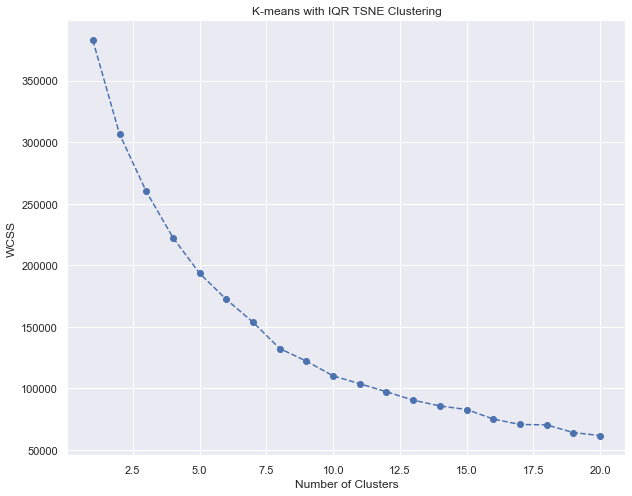

In [61]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with IQR TSNE Clustering')
plt.show()

In [62]:
kmeans_iqr = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
kmeans_iqr.fit(tsne_results)

KMeans(n_clusters=5, random_state=42)

In [63]:
df_segm_iqr_kmeans = pd.concat([X.reset_index(drop = True), pd.DataFrame(tsne_results,columns = tsneed.columns)], axis = 1)

df_segm_iqr_kmeans['Segment K-means IQR'] = kmeans_iqr.labels_
df_segm_iqr_kmeans['Cluster'] = df_segm_iqr_kmeans['Segment K-means IQR'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth'})
df_segm_iqr_kmeans['IN FILE'],df_segm_iqr_kmeans['LAST MOD BY'], df_segm_iqr_kmeans['Genus'] = Y_3,Y_2, Y

In [64]:
df_segm_iqr_kmeans

,0.25,0.5,0.75,TSNE1,TSNE2,TSNE3,Segment K-means IQR,Cluster,IN FILE,LAST MOD BY,Genus
0,1.8751,1.91010,1.96015,-4.793036,21.438496,-27.378454,2,third,Arremon-brunneinucha-297000.wav,kkong,Arremon
1,0.8323,0.91975,0.96220,-3.234881,25.109409,-10.347363,2,third,Arremon-castaneiceps-261298.wav,EdZamora,Arremon
2,0.8399,0.89995,1.00490,-11.868632,31.074387,8.097863,2,third,Automolus-infuscatus-270606.wav,kkong,Automolus
3,1.1098,1.17990,1.19980,-20.205452,-18.086123,15.336816,3,fourth,Automolus-rufipileatus-47553.wav,EdZamora,Automolus
4,0.7901,0.94010,1.62020,60.378315,-4.587010,-32.843533,1,second,Bolborhynchus-lineola-260395.wav,EdZamora,Bolborhynchus
...,...,...,...,...,...,...,...,...,...,...,...
225,0.6274,0.75990,0.88990,2.737564,11.904365,-2.744944,2,third,Sporophila-luctuosa-10617.wav,EdZamora,Sporophila
226,1.3500,4.16000,4.86000,-1.583090,-9.935959,-19.172449,3,fourth,Sporophila-plumbea-84743.wav,kkong,Sporophila
227,3.1501,3.39840,3.91175,19.880718,-10.069228,-21.564419,1,second,Sporophila-schistacea-371548.wav,kkong,Sporophila
228,0.5950,0.93000,1.14500,8.910795,6.025363,0.981416,2,third,Tachyphonus-phoenicius-357433.wav,EdZamora,Tachyphonus


In [65]:
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np


fig = px.scatter_3d(df_segm_iqr_kmeans, 
                    x='TSNE1',
                    y='TSNE2',
                    z='TSNE3' , 
                    color = df_segm_iqr_kmeans['Cluster'],
                    hover_name = list(tuple(zip(df_segm_iqr_kmeans['IN FILE'],df_segm_iqr_kmeans['LAST MOD BY'])))) 


#color = Y, color_discrete_sequence= px.colors.qualitative.G10)


# clust_1 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'first']
# x, y, z = clust_1['TSNE1'], clust_1['TSNE2'], clust_1['TSNE3']
# fig.add_trace(go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightblue', opacity=0.50)]).data[0])


# clust_2 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'second']
# x2, y2, z2 = clust_2['TSNE1'], clust_2['TSNE2'], clust_2['TSNE3']
# fig.add_trace(go.Figure(data=[go.Mesh3d(x=x2, y=y2, z=z2, color='lightblue', opacity=0.50)]).data[0])


# clust_3 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'third']
# x3, y3, z3 = clust_3['TSNE1'], clust_3['TSNE2'], clust_3['TSNE3']
# fig.add_trace(go.Figure(data=[go.Mesh3d(x=x3, y=y3, z=z3, color='lightblue', opacity=0.50)]).data[0])


# clust_4 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'fourth']
# x4, y4, z4 = clust_4['TSNE1'], clust_4['TSNE2'], clust_4['TSNE3']
# fig.add_trace(go.Figure(data=[go.Mesh3d(x=x4, y=y4, z=z4, color='lightblue', opacity=0.50)]).data[0])


# clust_5 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'fifth']
# x5, y5, z5 = clust_5['TSNE1'], clust_5['TSNE2'], clust_5['TSNE3']
# fig.add_trace(go.Figure(data=[go.Mesh3d(x=x5, y=y5, z=z5, color='lightblue', opacity=0.50)]).data[0])


fig.update_layout(title_text= (' & '.join(df_segm_iqr_kmeans['LAST MOD BY'].unique()) + ' Annotations'), title_x=0.5)
fig.show()

In [66]:
kaleidoscope_format = pd.read_csv('for_data_science_newline_fixed.csv')
for_kaleidoscope = kaleidoscope_format[kaleidoscope_format['IN FILE'].isin(df_segm_iqr_kmeans['IN FILE'].to_list())] 
for_kaleidoscope

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
1890,Arremon-brunneinucha-297000.wav,17.8416,8.2753,2.0102,24000,0,44100,Arremon brunneinucha Chestnut-capped Brushfinch,16.952,kkong,11/09/2021,03:55:24
1891,Arremon-brunneinucha-297000.wav,17.8416,14.5259,1.9101,24000,0,44100,Arremon brunneinucha Chestnut-capped Brushfinch,16.953,kkong,11/09/2021,03:55:24
1892,Arremon-brunneinucha-297000.wav,17.8416,0.4146,1.8401,24000,0,44100,Arremon brunneinucha Chestnut-capped Brushfinch,16.951,kkong,11/09/2021,03:55:24
1911,Arremon-castaneiceps-261298.wav,22.4131,5.8007,0.8098,24000,0,44100,Arremon castaneiceps Olive Finch,728.701,EdZamora,10/26/2021,09:58:56
1912,Arremon-castaneiceps-261298.wav,22.4131,1.8319,0.6898,24000,0,44100,Arremon castaneiceps Olive Finch,728.700,EdZamora,10/26/2021,09:58:56
...,...,...,...,...,...,...,...,...,...,...,...,...
26612,Tachyphonus-phoenicius-401522.wav,51.1920,45.2183,1.4901,24000,0,48000,Tachyphonus phoenicius Red-shouldered Tanager,1.565,kkong,11/19/2021,09:52:38
26613,Tachyphonus-phoenicius-401522.wav,51.1920,43.6983,1.3300,24000,0,48000,Tachyphonus phoenicius Red-shouldered Tanager,1.562,kkong,11/19/2021,09:52:38
26614,Tachyphonus-phoenicius-401522.wav,51.1920,46.9084,1.4801,24000,0,48000,Tachyphonus phoenicius Red-shouldered Tanager,1.564,kkong,11/19/2021,09:52:38
26615,Tachyphonus-phoenicius-401522.wav,51.1920,48.5385,1.3800,24000,0,48000,Tachyphonus phoenicius Red-shouldered Tanager,1.568,kkong,11/19/2021,09:52:38
